In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy                  # http://scipy.org/
from scipy import signal

from scipy.fftpack import fft, fftfreq
from time import time

from IPython.display import Image  
%matplotlib inline
params = {'legend.fontsize': 24,
          'figure.figsize': (8, 8),
         'axes.labelsize': 24,
         'axes.titlesize': 24,
         'xtick.labelsize':24,
         'ytick.labelsize':24}

plt.rcParams.update(params) 

El circuito de la figura es el mezclador realizado con MOSFET de doble compuerta.


![5-cuatrocientos](fig/mezclador_dual_v1.png)



$V_{R_s} = 2Vdc$

$V_{pol} = 4,5Vdc$

Ca: es un cortocircuito para todas las frecuencias de interés.

Con la polarización planteada  

$I_d= 2 \frac{mA}{V} \cdot  V_{g2} + 2  mA$  


Los parametros del transistor son:

La variación de la transconductancia desde el Gate 1 se muestra en el grafico y corresponde a $g_{21} = \frac{\partial i_d}{\partial v_{g1s}}$ en función de la tensión $v_{g2s}$.

$y_{11}(g1) = (0,1 + j0) \mu S$

$y_{22}     = (10 + j0) \mu S$

$y_{21}(g1) = g_{21}$


El oscilador $V_{OL}$ entrega una señal cuadrada (ver dibujo) con $V_{pp}=2V$ y  $T=34 ms$.


$V_g$ es una portadora pura (sin modulación) de $f_c= 98,235 MHz$ y $V_{pico}= 1 \mu V$

La carga $R_L$ representa la entrada del canal de $FI$ y está adaptada a MTEQcte.



Determinar:


1.  $V_o(10MHz)$

2.  $V_o(f_{OL})$

3.  Ganancia de Potencia de Conversión: $\frac{P_o}{P_{in}}$ (Nota: $P_o$ está a frecuencia de salida y $P_{in}$ a frecuencia de señal.

4. Suponiendo que el mezclador es la primera etapa de conversión de un Rx superheterodino de broadcasting FM con banda de paso en $88 MHz$ y $108 MHz$ y que los filtros de RF tiene una atencuación infinita fuera de dicha banda; encontrar las respuestas espúreas de dicho Rx.  

5.  Idem 4 pero cambiando la señal de OL por una onda cuadrada de igual amplitud y frecuencia pero un ciclo util de $10\%$.

6.  Idem 1 con $V_{pol} = 1 Vdc$ y $V_{ol} = 2Vp$ e igual frecuencia que la onda cuadrada original.

7.   Idem 1 con $V_{pol} = 2 Vdc$ y $V_{ol} = 5Vp$ e igual frecuencia que la onda cuadrada original.



In [2]:
def plotFFT(x,dt, l = 'x'):
    Y   = fft(x) / len(x)     # Normalizada
    frq = fftfreq(len(x), dt)  # Recuperamos las frecuencias
    plt.stem(frq, abs(Y) )  
    #plt.ylim(-0.1, 0.8)
    plt.xlabel('$Frecuencia/Hz$')
    plt.ylabel(l)
    plt.minorticks_on()
    plt.grid(b=True ,which='both', linestyle='-',alpha=0.2)
    #plt.show()
     

In [5]:
## Datos 

# vs1
Vg = 1e-6
fg = 98.235e6
wg  = 2*np.pi*fg

# Vol
Vpol = 4.5
Vs   = 2
Vol  = 1 
fol  = 1/34e-9
wol  = 2*np.pi*fol
print(fol)



# Filtro salida
ro = 10e3
fo = 10e6
Qc = 100
Qo = np.inf

## MOSFET!
# corriente id1
def id2o(vgs2):
    return 2e-3*vgs2+2e-3
    

# Transferencia del dualFET
def gmd(v):
    i = list()
    for vi in v:
        if (vi < 1.)                : i.append(1e-3)
        elif (vi >= 1  and vi < 4)  : i.append((3e-3)*(vi-1)+1e-3) 
        else                        : i.append(10e-3) 
    return np.array(i)


29411764.70588235


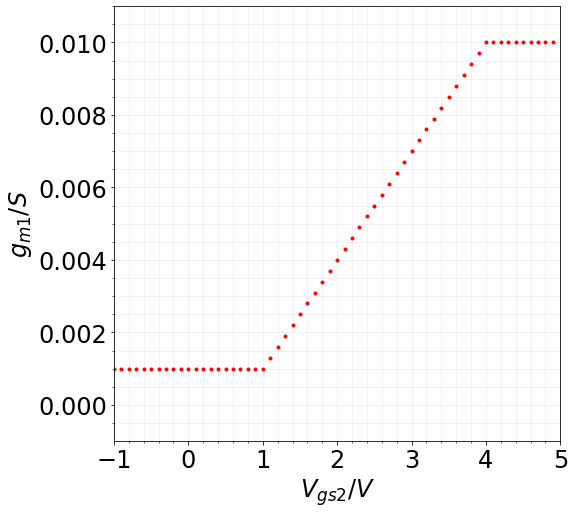

In [6]:
# Plot de la transferencia del MOSFET
vs  = np.arange(-1.,5.,0.1)
gm  = gmd(vs)

plt.plot(vs,gm,'r.')
plt.axis([-1, 5, -1e-3, 11e-3])
plt.ylabel('$g_{m1}/S$')
plt.xlabel('$V_{gs2}/V$')
plt.minorticks_on()
plt.grid(b=True ,which='both', linestyle='-',alpha=0.2)
plt.show()

In [7]:
## Para el procesamiento de senales!!
fsa   = 500e6  # sampleo: máxima frecuencia del espectro fsa/2 
dt    = 1/fsa

fmin  = 100e3   # pasos en frecuencias del espectro (frecuencia mínima) 
Ts    = 1/(fmin)

t   = np.arange(0,Ts,dt) # vector tiempo

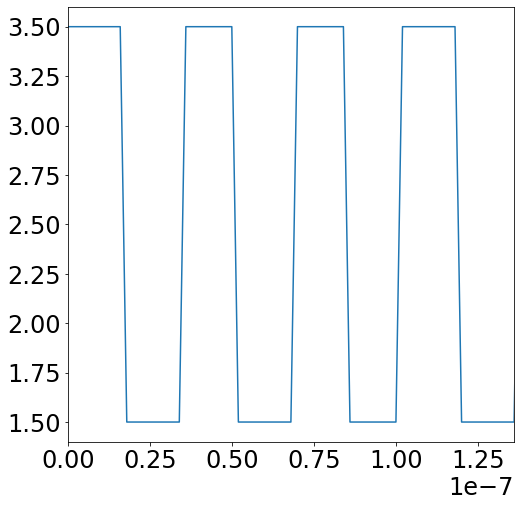

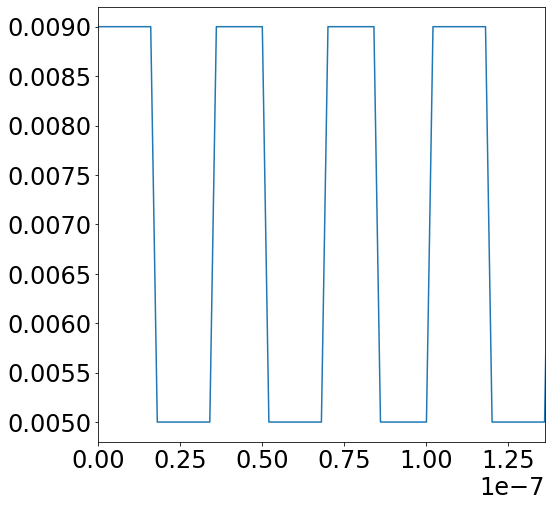

In [8]:
# Vol
vol   = Vpol + Vol*signal.square(wol*t)
vgs2  = vol - Vs

# corriente id2
id2  = id2o(vgs2)

plt.plot(t, vgs2)
plt.xlim([0, 4/fol])
plt.show()

plt.plot(t, id2)
plt.xlim([0, 4/fol])
plt.show()



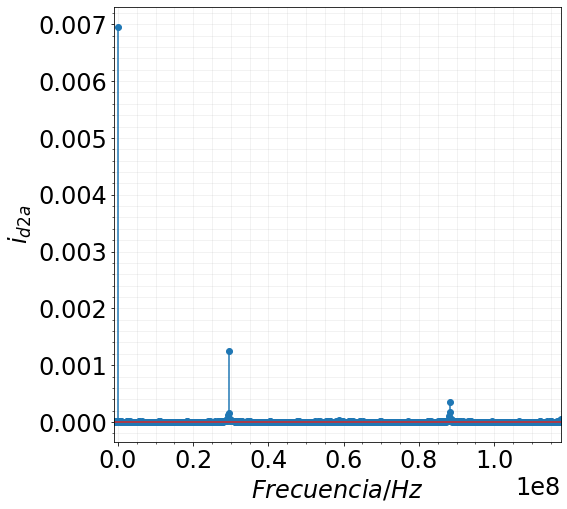

In [9]:
## FFT! 
plotFFT(id2, dt, '$i_{d2a}$' )
plt.xlim([-1e6,4*fol])
plt.show()


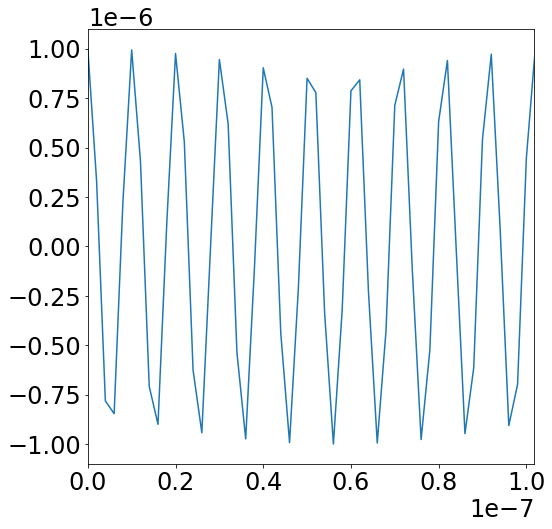

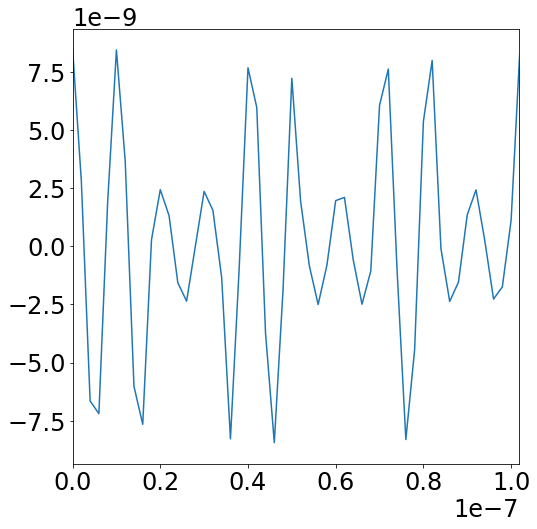

In [32]:
vg1 = Vg*np.cos(wg*t)
id1 = gmd(vgs2)*vg1

plt.plot(t,vg1)
plt.xlim([0, 10/fg])
plt.show()

plt.plot(t, id1)
plt.xlim([0, 10/fg])
plt.show()

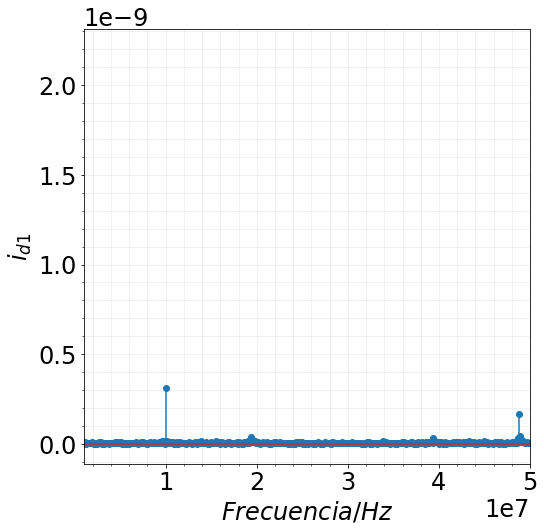

In [43]:
## FFT! 
plotFFT(id1, dt, '$i_{d1}$' )
plt.xlim([1e6,50e6])
plt.show()


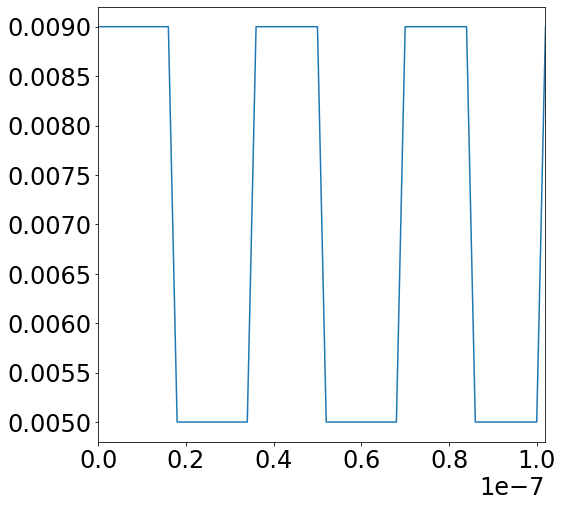

In [63]:
ido = (id1 + id2) 


#plt.plot(t,id2)
plt.plot(t,ido)
plt.xlim([0, 10/fg])
#plt.ylim([8.99999e-3,9.00001e-3])
plt.show()




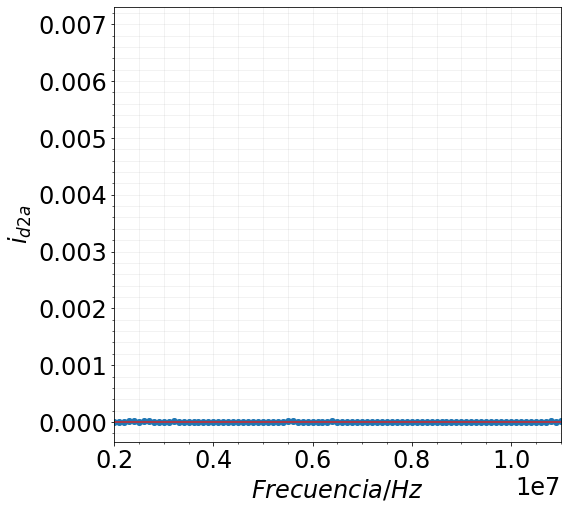

In [42]:
## FFT! 
plotFFT(id, dt, '$i_{d2a}$' )
plt.xlim([2e6,11e6])
plt.show()


In [27]:
idof = fft(ido) / len(ido)     # Normalizada
frq  = fftfreq(len(ido), dt)  # Recuperamos las frecuencias


vo = list()
for i,f in enumerate(frq):
    if f == 0: vo.append(0) 
    else :    
        vo.append(idof[i]*ro/(1+1j*Qc*(f/fo-fo/f)))
    
    


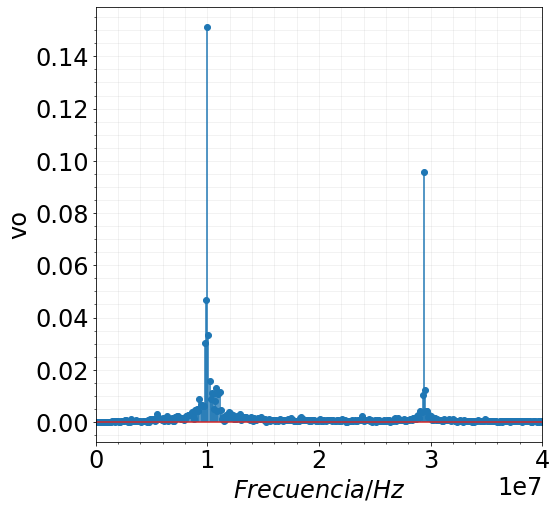

In [58]:
plt.stem(frq, 2*abs(np.array(vo)) )  
plt.xlim(-0.1, 40e6)
plt.xlabel('$Frecuencia/Hz$')
plt.ylabel('vo')
plt.minorticks_on()
plt.grid(b=True ,which='both', linestyle='-',alpha=0.2)
#plt.show()

In [60]:
# Calculo resistencia de carga para max excursion de salida


L   = (1/Qc-1/Qo)*ro/(2*np.pi*fo)

C   = 1/(L*(2*np.pi*fo)**2)

print('.param ro = {:1.2f}'.format(abs(ro)))

print('.param L = {:1.4e}'.format(abs(L)))
print('.param C = {:1.4e}'.format(abs(C)))

.param ro = 10000.00
.param L = 1.5915e-06
.param C = 1.5915e-10


# $g_c$: transconductancia de conversion del MOSFET.


## Analsis de las corrientes de uno de los transistores (J1).


### Corriente $i_{D}$


La corriente del MOSFET de doble compuerta depende de dos compuertas GATE. Las tensiones de ambas compuertas producen corriente en el DRAIN. 

Por lo tanto, esta corriente $i_D$ depende de la tensión $v_{GS1}$ y la tensión $v_{GS2}$ 

$$i_D = i_{D1} + i_{D2}$$


### Corriente $i_{D2}$ 


La corriente $i_{D2}$ se puede calcular mediante la ecuación 

$$i_{D2} = 2\frac{mA}{V} \cdot v_{gs2} + 2 mA $$

Donde $v_{gs2}$ corresponde a la tensión de fuente del oscilador local $v_{ol}$ afectada por el filtro RC. 

$$v_{ol} = 2.5V + 1V \cdot square(\omega_{ol} \cdot t)$$


La respuesta del filtro RC,

$$A_{vRC}(11MHz) = \frac{1}{1+j\omega_{ol} C R} = 0.69$$



Entonce,

$$v_{gs2} = 2.5V + 2V \cdot A_{vRC}(\omega_{ol}) \cdot cos(\omega_{ol} \cdot t)$$

$$v_{gs2} = 2.5V + 1.38V \cdot cos(\omega_{ol} \cdot t)$$


La corriente $i_{d2}$$

$$i_{d2} = 9 mA + 2.7 mA \cdot cos(\omega_{ol} \cdot t)$$

$$i_{d2} = 9 mA + 2.7 mA \cdot cos(2 \pi 11MHz \cdot t)$$



Donde el espectro en frecuencia $i_{d2}$ en este caso

![ex 2.13](id2a.png)


#### Corriente $i_{d1}$ 

La compuerta G2 es la que modifica la transconductancia $g_{m1}$ del transistor. Para ello, la tensión $v_{gs2}$ tiene una gran escursión. 
En el ejercicio, $v_{gs2}$ tiene una escursión de algunos voltios. 


La compuerta G1 no debe modificar la transconductancia, por lo tanto, la señal $v_{gs1}$ es de pequeña señal (algunos $\mu V$).


La corriente $i_{d1}$ entonces se calcula como


$$i_{d1} = g_{m1}(t) \cdot v_{gs1}$$


Dado que $g_{m1}$ varia en función de $v_{gs2}$, $g_{m1}$ tiene un espectro en frecuencia que depende de  $v_{gs2}$ y la respuesta del MOSFET.

Por lo tanto, el espectro de $i_{d1}$ depende de la convolución de $g_{m1}$ con $v_{gs1}$.  


La trasconductancia se obtiene del gráfico de $g_{m1}$ en función de $v_{gs2}$. Entonces, 


$$
   f(x)= 
\begin{cases}
    g_{m1} = 1 S , & \text{si }  x  < 1  \\
    g_{m1} = 3 \frac{S}{V} \cdot v_{gs2} - 2 S , & \text{si } 1 \ge x \le 4  \\
    g_{m1} = 10 S,              & \text{otherwise}
\end{cases}
$$



Para conocer la trasconductacia, $v_{gs2MAX} = 3.88V$ y $v_{gs2MAX} = 1.12V$.



Por lo tanto, 

$$g_{m1} = 3 \frac{mS}{V} \cdot v_{gs2} - 2 mS$$

$$g_{m1} = 5.5 mS +  4.14 mS \cdot cos(\omega_{ol} \cdot t)$$

$$g_{m1} = 5.5 mS +  4.14 mS \cdot cos( 2 \pi 11MHz  \cdot t)$$



La tensión en la compuerta G1

$$v_{gs1} = 10 \mu V \cdot cos(\omega_{s} t)$$

$$v_{gs1} = 10 \mu V \cdot cos(2 \pi 10MHz t)$$



La corriente del DRAIN dada la compuerta G1

$$i_{d1} = g_{m1} \cdot v_{gs1}$$



La convolución entre $g_{m1}$ y $v_{gs1}$ da como

$$i_{d1} =  5.5 mS \cdot 10 \mu V \cdot cos(2 \pi 10MHz t) + \frac{4.14 mS \cdot 10 \mu V}{2} \cdot cos( 2 \pi  1MHz  \cdot t) + \frac{4.14 mS \cdot 10 \mu V}{2} \cdot cos( 2 \pi 21MHz  \cdot t)  $$

$$i_{d1} =  55 nA \cdot cos(2 \pi 10MHz t) + 20.7 nA \cdot cos( 2 \pi  1MHz  \cdot t) + 20.7 nA \cdot cos( 2 \pi 21MHz  \cdot t)$$



![ex 2.13](gm1_vgs1.png)



![ex 2.13](id1.png)



#### Corriente total $i_d$


Recordando

$$i_d = i_{d1} + i_{d2}$$



La corriente entonces

$$i_{d} =  9 mA + 20.7 nA \cdot cos( 2 \pi  1MHz  \cdot t) + 55 nA \cdot cos(2 \pi 10MHz t)  + 2.7 mA \cdot cos(2 \pi 11MHz \cdot t) + 20.7 nA \cdot cos( 2 \pi 21MHz  \cdot t)  $$

### Trasconductancia de conversión $g_{c}$ 

Por lo tanto, $g_c$ produce corriente en $10MHz$

$$g_c= \frac{4.14 mS}{2} = 2.07 mS$$



## Corriente de salida sobre la salida

![ex 2.13](dual_pushpull_fases.png)


La tensión en la compuerta G1 depende de la polaridad del transformador de entrada. 


Por lo tanto, el defasaje entre ambos transistores es de $180$ grados. 

$$v_{gs1a} = -v_{gs1b}$$



En relación a la compuerta G2, ambos transistores tienen el mismo filtro y la senal esta en fase

$$v_{gs2a} =  v_{gs2b}$$



La corriente sobre el filtro de salida pasa por un transformador que invierte la fase y suma las corrientes. 

Dado que la senal del oscilador local solo se invierte con el transformador de salida, esto hace que esta corriente resulte nula. 






